# Wind Stress

Mean zonal wind stress profile

**Requirements:** The `conda/analysis3-19.10` (or later) module on the VDI (or your own up-to-date cookbook installation).

## Theory

Wind stress, $\tau$, transfers momentum from the atmosphere to the ocean.

## Calculation

In [2]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client

In [3]:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:34933 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [4]:
session = cc.database.create_session()
start_time='1950-01-01'

The following code block shows the zonal- and time-averaged wind stress forcing for each experiment.

In [5]:
def calc_mean_tau_x(expt):
    
    tau_x = cc.querying.getvar(expt, 'tau_x', session, start_time=start_time)

    mean_tau_x = tau_x.mean('xu_ocean').mean('time')
    mean_tau_x = mean_tau_x.compute()
    mean_tau_x.name = expt
    
    return mean_tau_x

In [16]:
expts = ['01deg_jra55v13_ryf9091', '01deg_jra55_SAMextr_1011_from9091']

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/cosima_cookbook/querying.py:134: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  **xr_kwargs
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/g/data3/hh5/public/apps/min

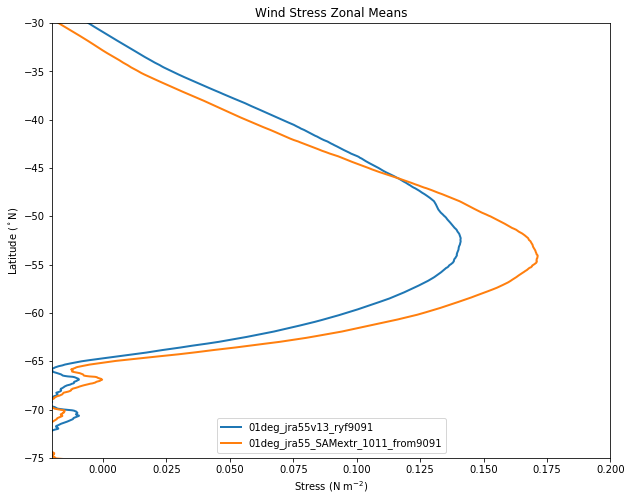

In [17]:
plt.figure(figsize=(10,8))

for expt in expts:
    mean_tau_x = calc_mean_tau_x(expt)
    plt.plot(mean_tau_x, mean_tau_x.yu_ocean,
             linewidth=2,
             label=expt)

plt.ylim([-75,-30])
plt.xlim([-0.02,0.2])
plt.ylabel('Latitude ($^\circ$N)')
plt.xlabel('Stress (N m$^{-2}$)')
plt.legend(loc=8, fontsize=10)
plt.title('Wind Stress Zonal Means')
plt.show()